# Desafio Advanced Analytics - Análise Exploratória, Modelagem e Otimização

Cliente que tem um processo industrial que transforma chocolate em bombons. O processo conta com 3 variáveis para cada lote de bombons produzido QTD CHOC,VAR 1 e VAR 2. Sendo que, a única variável que podemos controlar é QTD CHOC, a quantidade
de chocolate na entrada do processo

In [27]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
from numpy import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
from sklearn.model_selection import KFold

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import dos dados
df = pd.read_excel('registros-prod.xlsx').sort_values(by=['VAR_2'])
df.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
238,298.61,2.95,A,11.760475
243,293.75,1.05,A,9.782790
246,331.73,2.27,A,12.370195
248,325.10,2.16,A,11.537959


# Análise Descritiva e Diagnóstica
Têm como objetivo compreender as incertezas do processo e sua origem por meio de ferramentas estatísicas, para a fundamentação de tomadas de decisão na otimização do custo da produção

Variância dos pesos: 2.471915505596019


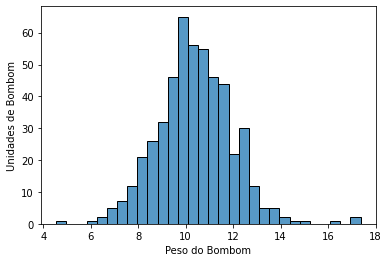

In [3]:
# histrograma da coluna PESO_BOMBOM
hist = sns.histplot(data=df, x="PESO_BOMBOM", bins=30)
hist.set(xlabel = 'Peso do Bombom', ylabel = 'Unidades de Bombom')

print("Variância dos pesos:",st.variance(df.PESO_BOMBOM))

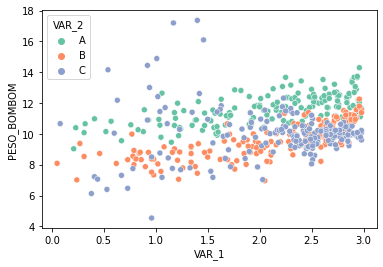

In [4]:
# distribuição do peso para VAR_1
scatter1 = sns.scatterplot(data=df, x="VAR_1", y="PESO_BOMBOM", hue="VAR_2", palette="Set2")

<AxesSubplot:xlabel='QTD_CHOC', ylabel='PESO_BOMBOM'>

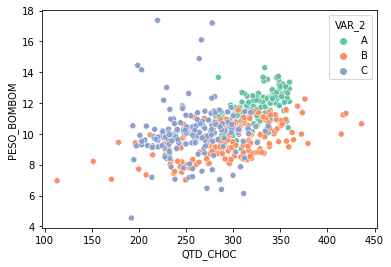

In [5]:
# distribuição do peso para QTD_CHOC
sns.scatterplot(data=df, x="QTD_CHOC", y="PESO_BOMBOM", hue="VAR_2", palette="Set2")

<AxesSubplot:xlabel='VAR_2', ylabel='PESO_BOMBOM'>

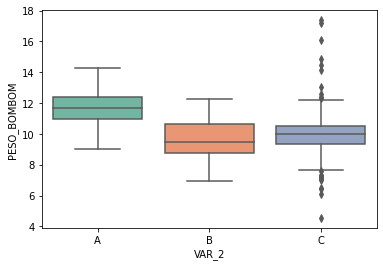

In [6]:
# distribuição do peso para as categorias de VAR_2
sns.boxplot(x="VAR_2", y="PESO_BOMBOM", data=df, palette="Set2")

<ipython-input-7-4227115212ff>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  Xpd.hist(ax = ax)


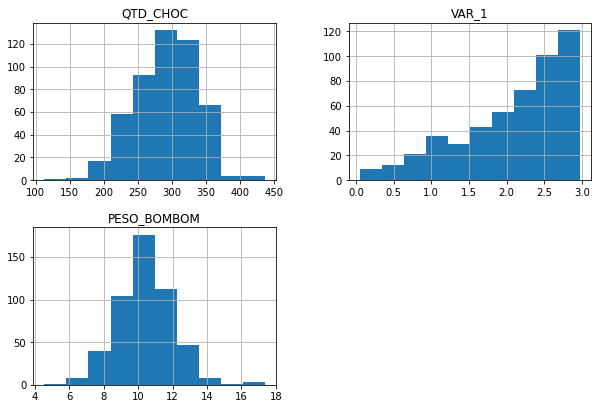

In [7]:
Xpd = pd.DataFrame(df) # histograma de todas a variáveis
fig, ax = plt.subplots(figsize=(10,6.66))
Xpd.hist(ax = ax)
pass

# Análise Preditiva

In [8]:
def mse(y,yhat):
    return np.sum(np.square(y-yhat))/len(y) # funções para MSE e RMSE
def rmse(y,yhat):
    return np.sqrt(mse(y,yhat))

In [9]:
label.fit(df.VAR_2)    # label encoding
df["VAR_2"] = label.transform(df.VAR_2)

In [10]:
# criação de X(entrada) e y(saída) segmentado pras categorias de VAR_2
X,y = [0,0,0],[0,0,0]

for i in [0,1,2]:
    X[i] = (df.loc[df['VAR_2'] == i]).drop('PESO_BOMBOM',axis=1).drop('VAR_2',axis=1)
    y[i] = (df.loc[df['VAR_2'] == i]).PESO_BOMBOM.values

MSE 0.22375947911714492


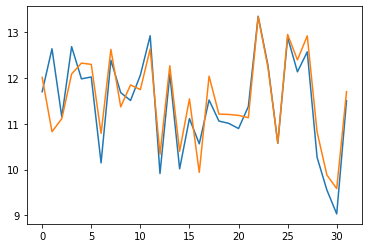

In [11]:
# modelo preditivo para a categoria A
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X[0], y[0], test_size=0.2, random_state=0)

regA = LinearRegression().fit(X_trainA, y_trainA)
y_predA = regA.predict(X_testA)

print("MSE",mse(y_testA,y_predA))
plt.plot(y_testA)
plt.plot(y_predA)
plt.show()

MSE 0.15444868637989126


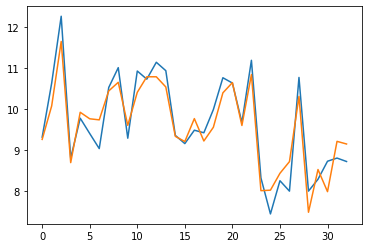

In [12]:
# modelo preditiva para a categoria B
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X[1], y[1], test_size=0.2, random_state=0)

regB = LinearRegression().fit(X_trainB, y_trainB)
y_predB = regB.predict(X_testB)

print("MSE",mse(y_testB,y_predB))
plt.plot(y_testB)
plt.plot(y_predB)
plt.show()

MSE 2.224238835498664


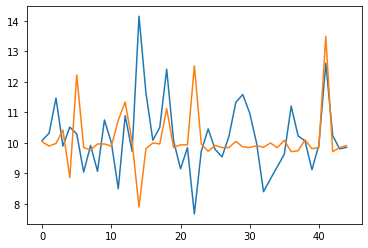

In [13]:
# modelo preditiva para a categoria C
X_trainC, X_testC, y_trainC, y_testC = train_test_split(X[2], y[2], test_size=0.25, random_state=0)

xg_regr = xgb.XGBRegressor(scale_pos_weight=1,learning_rate=0.01,  colsample_bytree = 0.5,subsample = 0.65,objective='reg:squarederror', n_estimators=1000, reg_alpha = 0.53,max_depth=3, gamma=10)
xg_regr.fit(X_trainC,y_trainC)
y_predC = xg_regr.predict(X_testC)

print("MSE",mse(y_testC,y_predC))
plt.plot(y_testC)
plt.plot(y_predC)
plt.show()
# xg_regr = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 1,max_depth = 3, alpha = 11, n_estimators =21) MSE = 1.5362

In [14]:
from sklearn.model_selection import KFold # implementação do kFold para otimização dos hiperpâmetros de xgboost
for i in [2]:
    df_p = df.loc[df['VAR_2'] == i]
    X_train, X_test, y_train, y_test = train_test_split((df_p.drop('PESO_BOMBOM',axis=1)), (df_p.PESO_BOMBOM.values), test_size=0.25, random_state=0)

X_train = X_train.values
X_test = X_test.values

In [15]:
# learning_rate = 0.1
# n_estimators = 1000
# max_depth = 2
# gamma = 30 ou 10
# subsample = 0.91
# reg_alpha = 0.51
# colsample_bytree = 0.5

# var = 75
# n_splits_kfold = 4
# kf = KFold(n_splits = n_splits_kfold)
# acc_vec = np.zeros(var)

# for j in range(var):
#     acc = 0
#     for train_index, test_index in kf.split(X_train):
#         X_train_kfold, X_test_kfold = X_train[train_index], X_train[test_index]
#         y_train_kfold, y_test_kfold = y_train[train_index], y_train[test_index]
        
#         xg_regr = xgb.XGBRegressor(n_estimators=1000,max_depth=2,learning_rate=0.01,gamma=30,subsample = 0.91, colsample_bytree = 0.5,scale_pos_weight=1, reg_alpha = 0.53,objective='reg:squarederror')
#         xg_regr.fit(X_train_kfold,y_train_kfold)
#         y_pred_kfold = xg_regr.predict(X_test_kfold)
#         acc += mse(y_test_kfold,y_pred_kfold)

#     acc_vec[j] = acc/n_splits_kfold

# plt.plot(acc_vec)
# best_var = acc_vec.argmin() + 1
# print(best_var)


In [16]:
# cross validation frações
# var = [0.56,0.57,0.6,0.65,0.7,0.75,0.8,0.9,0.9]

# n_splits_kfold = 4
# kf = KFold(n_splits = n_splits_kfold)
# acc_vec = np.zeros(len(var))

# for j in range(len(var)):
#     acc = 0
#     for train_index, test_index in kf.split(X_train):
#         X_train_kfold, X_test_kfold = X_train[train_index], X_train[test_index]
#         y_train_kfold, y_test_kfold = y_train[train_index], y_train[test_index]
        
#         xg_regr = xgb.XGBRegressor(n_estimators=1000,max_depth=2,learning_rate=0.1, gamma=2,subsample = 0.65, colsample_bytree = var[j], reg_alpha = 0.53,scale_pos_weight=1,objective='reg:squarederror')
#         xg_regr.fit(X_train_kfold,y_train_kfold)
#         y_pred_kfold = xg_regr.predict(X_test_kfold)
#         acc += mse(y_test_kfold,y_pred_kfold)

#     acc_vec[j] = acc/n_splits_kfold

# plt.plot(acc_vec)
# best_var = acc_vec.argmin() + 1
# print(best_var)

In [17]:
# import dos dados a serem preditos
df_2 = pd.read_excel('analise-preditiva.xlsx')

label.fit(df_2.VAR_2)   # label encoding
df_2["VAR_2"] = label.transform(df_2.VAR_2)
df_2.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,286.63,2.72,0,NaN
1,257.27,1.97,1,NaN
2,353.16,2.64,0,NaN
3,317.78,2.76,0,NaN
4,248.10,2.63,2,NaN


In [18]:
yhat = [] # variável p/ resultados

i = 0 # marcador para o for
for index, row in df_2.iterrows(): # itera em todas as linhas de df_pred
    i += 1
    X = pd.DataFrame(columns = ['QTD_CHOC','VAR_1']) # cria variável de entrada para predição
    X.loc[i] = [row[0]] + [row[1]]
    
    if row [2] == 0:  # aplica o modelo adequado p/ cada categoria
        y_pred = regA.predict(X)
    if row [2] == 1:
        y_pred = regB.predict(X)
    else:
        y_pred = xg_regr.predict(X)
    yhat.append(y_pred[0]) # salva a predição desta iteração

df_2['PESO_BOMBOM'] = yhat # incopora os resultados ao df
#df_2.to_excel('analise-preditiva-done.xlsx', index=False) # atualiza o arquivo .xlsx com a predição

#print(yhat)

In [ ]:
# aplicar os modelos nos dados históricos para ver se a divisão por categorias funciona
# e trazer novas métricas de desempenho, porcentagem de acerto etc

# Análise Prescritiva
Com o auxilio da função de transferência do custo, determinar qual o valor ótimo de QTD_CHOC a partir das entradas pré-determinadas VAR_1 e VAR_2 para a minimização do custo

In [19]:
df_3 = df.copy() # cópia dos dados 

cf = [] # cálculo da coluna CUSTO
for p in df_3.PESO_BOMBOM:
    cf.append(200/(1+math.exp(10*(p-9.5))) + 200/(1+math.exp(-0.8*(p-12))))
df_3["CUSTO"] = cf

df_3.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,CUSTO
0,320.15,0.88,0,10.144919,37.278717
238,298.61,2.95,0,11.760475,90.448214
243,293.75,1.05,0,9.782790,40.181833
246,331.73,2.27,0,12.370195,114.700527
248,325.10,2.16,0,11.537959,81.725958


In [20]:
X = df_3.drop('CUSTO',axis=1).drop('PESO_BOMBOM',axis=1) # entrada X sem as colunas PESO_BOMBOM e CUSTO
y = df_3.CUSTO.values                                    # saida Y com coluna CUSTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


X_train = X_train.values
X_test = X_test.values

In [21]:
X_presc,y_presc = [0,0,0],[0,0,0]

for i in [0,1,2]:
    X_presc[i] = (df_3[df_3['VAR_2'] == i]).drop('CUSTO',axis=1).drop('PESO_BOMBOM',axis=1) 
    y_presc[i] = (df_3.loc[df_3['VAR_2'] == i]).CUSTO.values
    
X_trainAp, X_testAp, y_trainAp, y_testAp = train_test_split(X_presc[0], y_presc[0], test_size=0.2, random_state=0)    
X_trainBp, X_testBp, y_trainBp, y_testBp = train_test_split(X_presc[1], y_presc[1], test_size=0.2, random_state=0)
X_trainCp, X_testCp, y_trainCp, y_testCp = train_test_split(X_presc[2], y_presc[2], test_size=0.2, random_state=0)

X_trainCp = X_trainCp.values
X_testCp = X_testCp.values

RMSE 39.95889695765937
MSE 1596.7134460728394


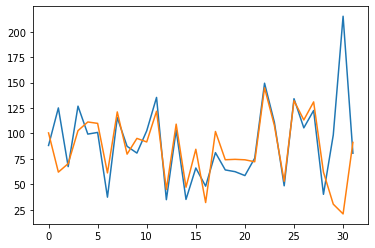

In [22]:
regAp = LinearRegression().fit(X_trainAp, y_trainAp) # pensar na substituição por outro modelo
y_predAp = regAp.predict(X_testAp)
    
print("RMSE",rmse(y_testAp,y_predAp))
print("MSE",mse(y_testAp,y_predAp))
plt.plot(y_testAp)
plt.plot(y_predAp)
plt.show()

RMSE 46.88377781205309
MSE 2198.088621929962


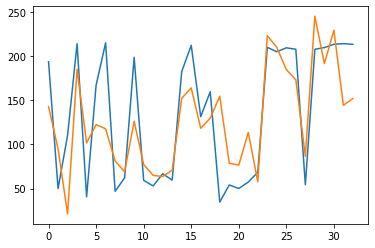

In [23]:
regBp = LinearRegression().fit(X_trainBp, y_trainBp)
y_predBp = regBp.predict(X_testBp)
    
print("RMSE",rmse(y_testBp,y_predBp))
print("MSE",mse(y_testBp,y_predBp))
plt.plot(y_testBp)
plt.plot(y_predBp)
plt.show()

RMSE 67.10951062262903
MSE 4503.686416008758


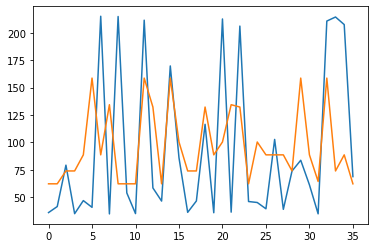

In [24]:
# objective ='reg:squarederror'
# min_child_weight = 53
# max_depth = 2
# subsample = 1
# colsample_bytree = 0.8
# gamma = 1
# learning rate = 1
# alpha = 1
# n_estimators = 1000 ou 5

xg_regrp = xgb.XGBRegressor(objective='reg:squarederror', min_child_weight=53, max_depth=2, subsample=1, colsample_bytree=0.8, gamma=1,learning_rate=1, alpha=1, n_estimators=5)
xg_regrp.fit(X_trainCp,y_trainCp)
y_predCp = xg_regrp.predict(X_testCp)
    
print("RMSE",rmse(y_testCp,y_predCp))
print("MSE",mse(y_testCp,y_predCp))
plt.plot(y_testCp)
plt.plot(y_predCp)
plt.show()

In [25]:
# import dos dados a serem prescritos
df_presc = pd.read_excel('analise-prescritiva.xlsx')

# label encoding
label = preprocessing.LabelEncoder()
label.fit(df_presc.VAR_2)
df_presc["VAR_2"] = label.transform(df_presc.VAR_2)

df_presc.head()

,QTD_CHOC,VAR_1,VAR_2
0,NaN,2.07,2
1,NaN,2.94,1
2,NaN,2.53,1
3,NaN,2.19,1
4,NaN,2.02,2


In [26]:
# encontrar para cada linha qual valor de QTD_CHOC retorna o menor custo

amostras = range(100,400) # valores de teste para QTD_CHOC
yhat = [] # resultados

for index,row in df_presc.iterrows(): # iteração para cada linha a ser prescrita
    X = pd.DataFrame(columns = ['QTD_CHOC','VAR_1' , 'VAR_2']) # cria novo df 
    
    for j in range(len(amostras)): # iteração para cada valor teste QTD_CHOC
        X.loc[j] =  [amostras[j]] + [row[1]] + [row[2]]
    
    if (X.loc[0][2] < 1.0):
        y_pred = regAp.predict(X)
    if (X.loc[0][2] > 1.0):
        y_pred = xg_regrp.predict(X.values)
    else:
        y_pred = regBp.predict(X)

    print(y_pred)
    yhat.append(np.argmin(y_pred))
    



[158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.6

[158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.6

[246.64342757 246.08118946 245.51895134 244.95671322 244.3944751
 243.83223699 243.26999887 242.70776075 242.14552264 241.58328452
 241.0210464  240.45880828 239.89657017 239.33433205 238.77209393
 238.20985582 237.6476177  237.08537958 236.52314146 235.96090335
 235.39866523 234.83642711 234.274189   233.71195088 233.14971276
 232.58747465 232.02523653 231.46299841 230.90076029 230.33852218
 229.77628406 229.21404594 228.65180783 228.08956971 227.52733159
 226.96509347 226.40285536 225.84061724 225.27837912 224.71614101
 224.15390289 223.59166477 223.02942666 222.46718854 221.90495042
 221.3427123  220.78047419 220.21823607 219.65599795 219.09375984
 218.53152172 217.9692836  217.40704548 216.84480737 216.28256925
 215.72033113 215.15809302 214.5958549  214.03361678 213.47137866
 212.90914055 212.34690243 211.78466431 211.2224262  210.66018808
 210.09794996 209.53571185 208.97347373 208.41123561 207.84899749
 207.28675938 206.72452126 206.16228314 205.60004503 205.03780691
 204.475568

[100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044 100.39044
 100.3

[88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947 

[214.09395266 213.53171455 212.96947643 212.40723831 211.8450002
 211.28276208 210.72052396 210.15828584 209.59604773 209.03380961
 208.47157149 207.90933338 207.34709526 206.78485714 206.22261902
 205.66038091 205.09814279 204.53590467 203.97366656 203.41142844
 202.84919032 202.28695221 201.72471409 201.16247597 200.60023785
 200.03799974 199.47576162 198.9135235  198.35128539 197.78904727
 197.22680915 196.66457103 196.10233292 195.5400948  194.97785668
 194.41561857 193.85338045 193.29114233 192.72890421 192.1666661
 191.60442798 191.04218986 190.47995175 189.91771363 189.35547551
 188.7932374  188.23099928 187.66876116 187.10652304 186.54428493
 185.98204681 185.41980869 184.85757058 184.29533246 183.73309434
 183.17085622 182.60861811 182.04637999 181.48414187 180.92190376
 180.35966564 179.79742752 179.23518941 178.67295129 178.11071317
 177.54847505 176.98623694 176.42399882 175.8617607  175.29952259
 174.73728447 174.17504635 173.61280823 173.05057012 172.488332
 171.92609388 

[158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.6

[322.3563366  321.79409848 321.23186036 320.66962225 320.10738413
 319.54514601 318.9829079  318.42066978 317.85843166 317.29619354
 316.73395543 316.17171731 315.60947919 315.04724108 314.48500296
 313.92276484 313.36052673 312.79828861 312.23605049 311.67381237
 311.11157426 310.54933614 309.98709802 309.42485991 308.86262179
 308.30038367 307.73814555 307.17590744 306.61366932 306.0514312
 305.48919309 304.92695497 304.36471685 303.80247873 303.24024062
 302.6780025  302.11576438 301.55352627 300.99128815 300.42905003
 299.86681192 299.3045738  298.74233568 298.18009756 297.61785945
 297.05562133 296.49338321 295.9311451  295.36890698 294.80666886
 294.24443074 293.68219263 293.11995451 292.55771639 291.99547828
 291.43324016 290.87100204 290.30876393 289.74652581 289.18428769
 288.62204957 288.05981146 287.49757334 286.93533522 286.37309711
 285.81085899 285.24862087 284.68638275 284.12414464 283.56190652
 282.9996684  282.43743029 281.87519217 281.31295405 280.75071593
 280.188477

[158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953 158.66953
 158.6

[189.32804784 188.76580973 188.20357161 187.64133349 187.07909537
 186.51685726 185.95461914 185.39238102 184.83014291 184.26790479
 183.70566667 183.14342855 182.58119044 182.01895232 181.4567142
 180.89447609 180.33223797 179.76999985 179.20776173 178.64552362
 178.0832855  177.52104738 176.95880927 176.39657115 175.83433303
 175.27209492 174.7098568  174.14761868 173.58538056 173.02314245
 172.46090433 171.89866621 171.3364281  170.77418998 170.21195186
 169.64971374 169.08747563 168.52523751 167.96299939 167.40076128
 166.83852316 166.27628504 165.71404693 165.15180881 164.58957069
 164.02733257 163.46509446 162.90285634 162.34061822 161.77838011
 161.21614199 160.65390387 160.09166575 159.52942764 158.96718952
 158.4049514  157.84271329 157.28047517 156.71823705 156.15599893
 155.59376082 155.0315227  154.46928458 153.90704647 153.34480835
 152.78257023 152.22033212 151.658094   151.09585588 150.53361776
 149.97137965 149.40914153 148.84690341 148.2846653  147.72242718
 147.160189

[88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947  88.65947  88.65947  88.65947  88.65947  88.65947
 88.65947  88.65947 

[221.87752275 221.31528463 220.75304652 220.1908084  219.62857028
 219.06633217 218.50409405 217.94185593 217.37961781 216.8173797
 216.25514158 215.69290346 215.13066535 214.56842723 214.00618911
 213.44395099 212.88171288 212.31947476 211.75723664 211.19499853
 210.63276041 210.07052229 209.50828417 208.94604606 208.38380794
 207.82156982 207.25933171 206.69709359 206.13485547 205.57261736
 205.01037924 204.44814112 203.885903   203.32366489 202.76142677
 202.19918865 201.63695054 201.07471242 200.5124743  199.95023618
 199.38799807 198.82575995 198.26352183 197.70128372 197.1390456
 196.57680748 196.01456937 195.45233125 194.89009313 194.32785501
 193.7656169  193.20337878 192.64114066 192.07890255 191.51666443
 190.95442631 190.39218819 189.82995008 189.26771196 188.70547384
 188.14323573 187.58099761 187.01875949 186.45652137 185.89428326
 185.33204514 184.76980702 184.20756891 183.64533079 183.08309267
 182.52085456 181.95861644 181.39637832 180.8341402  180.27190209
 179.7096639

[180.12928319 179.56704508 179.00480696 178.44256884 177.88033073
 177.31809261 176.75585449 176.19361637 175.63137826 175.06914014
 174.50690202 173.94466391 173.38242579 172.82018767 172.25794956
 171.69571144 171.13347332 170.5712352  170.00899709 169.44675897
 168.88452085 168.32228274 167.76004462 167.1978065  166.63556838
 166.07333027 165.51109215 164.94885403 164.38661592 163.8243778
 163.26213968 162.69990156 162.13766345 161.57542533 161.01318721
 160.4509491  159.88871098 159.32647286 158.76423475 158.20199663
 157.63975851 157.07752039 156.51528228 155.95304416 155.39080604
 154.82856793 154.26632981 153.70409169 153.14185357 152.57961546
 152.01737734 151.45513922 150.89290111 150.33066299 149.76842487
 149.20618675 148.64394864 148.08171052 147.5194724  146.95723429
 146.39499617 145.83275805 145.27051994 144.70828182 144.1460437
 143.58380558 143.02156747 142.45932935 141.89709123 141.33485312
 140.772615   140.21037688 139.64813876 139.08590065 138.52366253
 137.9614244